# Basic Example about Regressions

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# We work together

In [25]:
# Generate the data
import numpy as np
x = np.random.rand(500)
y = 7*x + 3
y = (y + np.random.randn(500))

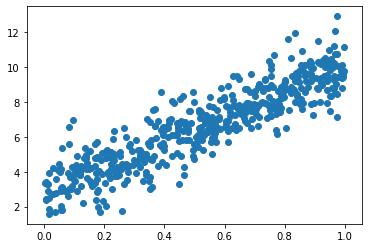

In [26]:
plt.scatter(x, y)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()
lm.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
start = lm.predict(np.array([[0]]))
end = lm.predict(np.array([[1]]))

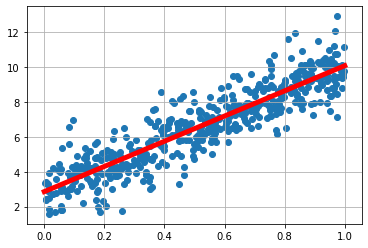

In [30]:
plt.scatter(x, y)
plt.plot([0, 1], [start, end], 'r', linewidth=5)
plt.grid()

### Define a function called predict_price that, given an array of inputs, gives you back the predictions

In [31]:
def predict_price(list_of_values, linear_model):
    list_of_values = np.array(list_of_values).reshape(-1, 1)
    return linear_model.predict(list_of_values)

# Use the function!
predict_price([1,2,4], lm)

array([10.06211527, 17.26611427, 31.67411228])

# It's your turn!

# Predict the price of the houses! Only one feature

In [44]:
housing_prices = pd.read_csv('./../datasets/housing/housing.csv')


housing_prices = housing_prices[['median_income',
                                 'median_house_value']]

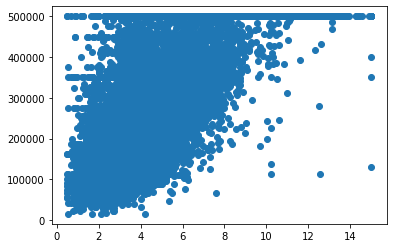

In [628]:
plt.scatter(housing_prices['median_income'], 
            housing_prices['median_house_value'])

In [45]:
housing_prices = housing_prices[housing_prices['median_house_value']<500000].copy()

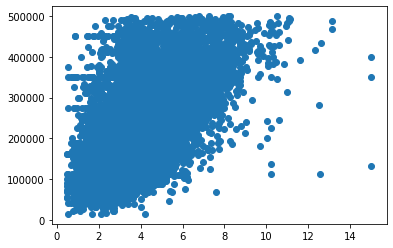

In [46]:
plt.scatter(housing_prices['median_income'], 
            housing_prices['median_house_value'])

In [52]:

lin = LinearRegression()
lin.fit(housing_prices[['median_income']],
        housing_prices['median_house_value'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
pip install sklearn

  Stored in directory: C:\Users\josef.rieger\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [61]:
preds = lin.predict(housing_prices[['median_income']])

In [63]:
 from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(housing_prices['median_house_value'], preds)

56437.706297685734

In [64]:
r2_score(housing_prices['median_house_value'], preds)

0.41824601638696535

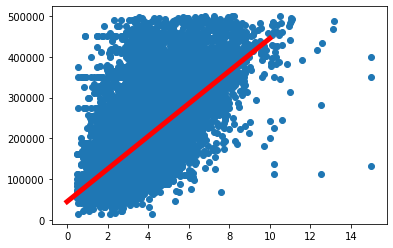

In [65]:
plt.scatter(housing_prices['median_income'], 
            housing_prices['median_house_value'])

start = lin.predict(np.array(0).reshape(-1,1))
end = lin.predict(np.array(10).reshape(-1,1))

plt.plot([0, 10], [start[0], end[0]], 'r', linewidth=5)

# Why the result is not sooooo good?
Do the same procedure, but before erasing the outliers and see if the prediction improve!

## Do a box plot of the "median_income" feature

In [636]:
# Boxplot use the median approach and not the mean!
# matplotlb is like a canvas and seaborn ist the painting on it. 

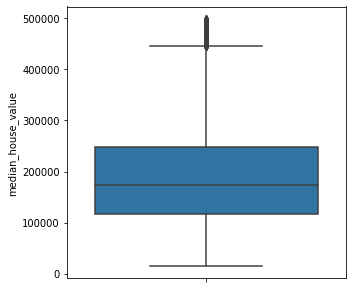

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sns.boxplot(data = housing_prices, y = housing_prices['median_house_value'])


In [638]:
## Remove the values more that .... ?
housing_prices = housing_prices[housing_prices['median_house_value']<500000].copy()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([382205.02759303, 381232.858037  , 338588.10944492, ...,
       111582.43336673, 118412.12873512, 139709.99455496])

56287.51395459692

0.41745341679003556

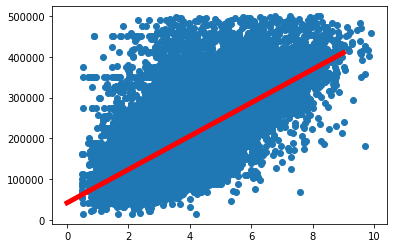

# Do you think that we could improve the result with more features?

In [659]:
housing_prices = pd.read_csv('housing.csv')
housing_prices = housing_prices[['housing_median_age',
                                 'population', 
                                 'median_income',
                                 'median_house_value']]

In [660]:
housing_prices.head()

,housing_median_age,population,median_income,median_house_value
0,41.0,322.0,8.3252,452600.0
1,21.0,2401.0,8.3014,358500.0
2,52.0,496.0,7.2574,352100.0
3,52.0,558.0,5.6431,341300.0
4,52.0,565.0,3.8462,342200.0


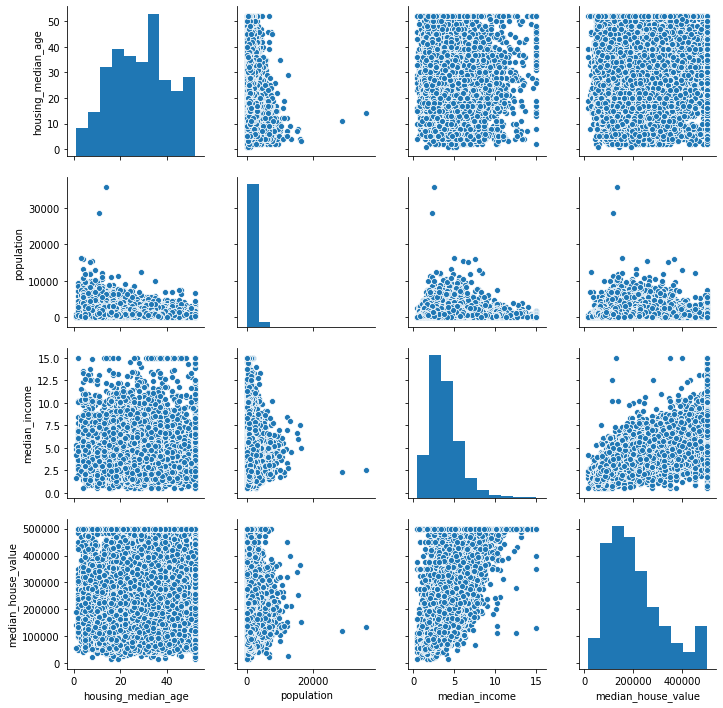

In [661]:
import seaborn as sns
sns.pairplot(housing_prices)

In [662]:
# Cleaning Data
housing_prices = housing_prices[housing_prices['median_house_value']<500000]
housing_prices = housing_prices[housing_prices['median_income']<10].copy()

In [663]:
lin = LinearRegression()
lin.fit(housing_prices.drop('median_house_value', axis=1), 
        housing_prices['median_house_value'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [664]:
preds = lin.predict(housing_prices.drop('median_house_value', axis=1))

In [665]:
def metrics_regression(df, preds):
    print('MAE: ' + str(mean_absolute_error(df['median_house_value'], preds)))
    print('R2 Score: ' + str(r2_score(df['median_house_value'], preds)))

metrics_regression(housing_prices, preds)

MAE: 54209.878798116624
R2 Score: 0.4593479450426776


In [667]:
lin.intercept_

-20446.392074779462

In [671]:
# Importance of features...
list(zip(lin.coef_, housing_prices.columns))

[(1681.8335098347923, 'housing_median_age'),
 (3.910727674637606, 'population'),
 (43359.94868180191, 'median_income')]

## Polynomial Regression: when Linear Regression can fit NON linear Data!

In [280]:
import pandas as pd

In [340]:
df_data = pd.read_csv('polynomial1.csv')

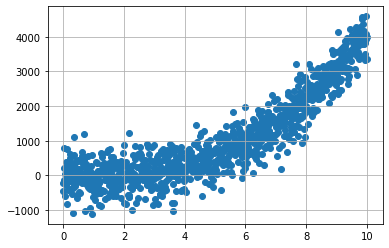

In [341]:
from matplotlib import pyplot as plt
plt.scatter(df_data['Solar_Power'], df_data['Temperature'])
plt.grid()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
p = Pipeline([('poly', PolynomialFeatures()),
              ('lin_reg', LinearRegression())])
grid = GridSearchCV(p, param_grid={'poly__degree': range(1, 20)}, cv=5)

#Grid.predict(new_data ) 

#you execute grid.predict(new_data), gives the data  

#-> the grid function has an important method refit (for new data which comes to the model as well)

# pipeline divides the data sets into training and testing data sets

# Cross validation (divides the datasets multiple times into testing and training sets, randomly!!!)

#to simulate new data receives simply divide the data set once before in 80/20 % and then apply your calculations work



In [286]:
grid.fit(data[['Solar_Power']], data[['Temperature']])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('lin_reg',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None, param_grid={'poly__degree': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

# It's your turn!

In [290]:
df_temp = pd.read_csv('polynomial2.csv')